### Variable signalAlign Outputs
Why are there different counts of variant calls between SA runs with different models?

1. Run SA and variant call our 5mC test data with 70 models.

2. Find "Failed Reads" from the baseline model
    * 175 “Failed” reads
        * These are reads that do not pass the initial kmer to event mapping using the baseline ONT model
        * Average log emission probability below -5.2
        * Not spanning the basecalled sequence
        * If a gap in alignment is over 50
        * If there are more than 5 events per kmer
        
3. Find different counts of variant calls
    * Compared 70 different models
        * 66 / 1592 (4.1%) reads with discrepancies
        * 677 / 49424 (1.4%) variants calls are missed by at least one of the 70 models

    * Without “Failed” Reads
        * 2 / 1588 (0.13%) reads with discrepancies
        * 33 / 49282 (0.070%) variants calls are missed by at least one of the 70 models




## Failed Read

None
Plotting plot_examples/fail/read_1b93d730-714e-4bbd-8782-1a04f1a2354c.fast5


<IPython.core.display.Javascript object>


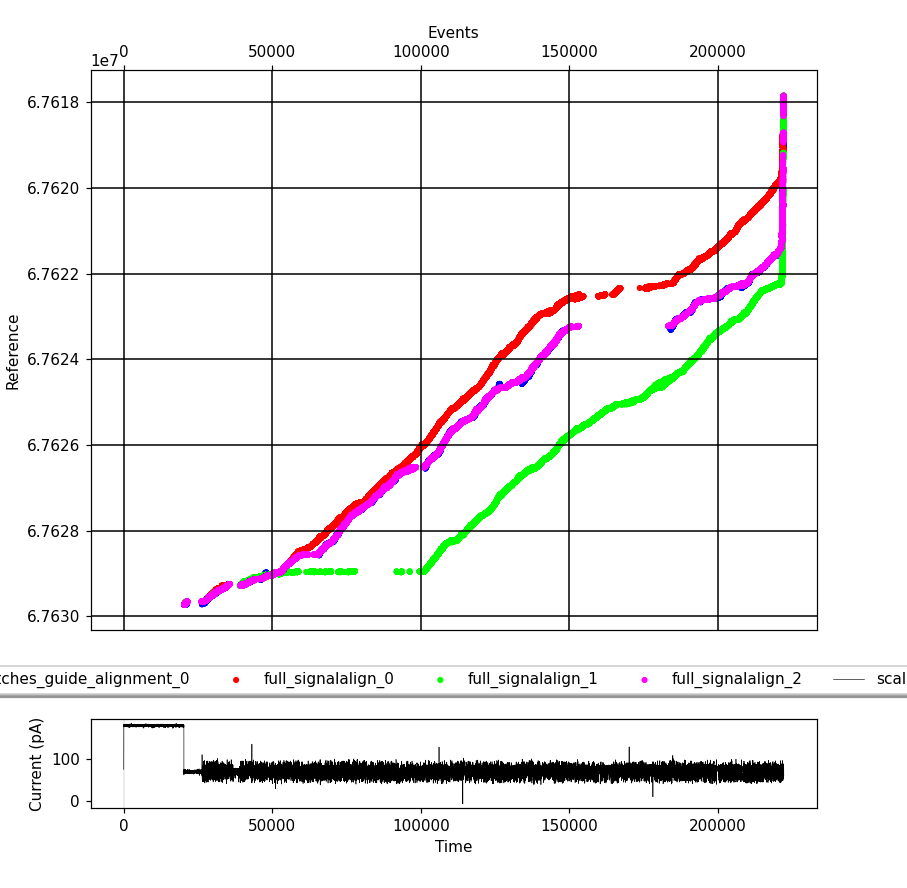

Running Time = 7.515109668020159 seconds


In [7]:
%matplotlib notebook
from signalalign.visualization.plot_labelled_read import main
from py3helpers.utils import create_dot_dict
args = create_dot_dict({
    "f5_path": "plot_examples/fail/read_1b93d730-714e-4bbd-8782-1a04f1a2354c.fast5",
    "sa_full": [0, 1, 2]})
main(args)

## Passed Read

None
Plotting plot_examples/pass/read_00e722a6-3b45-485f-98ad-ca091e597117.fast5


<IPython.core.display.Javascript object>


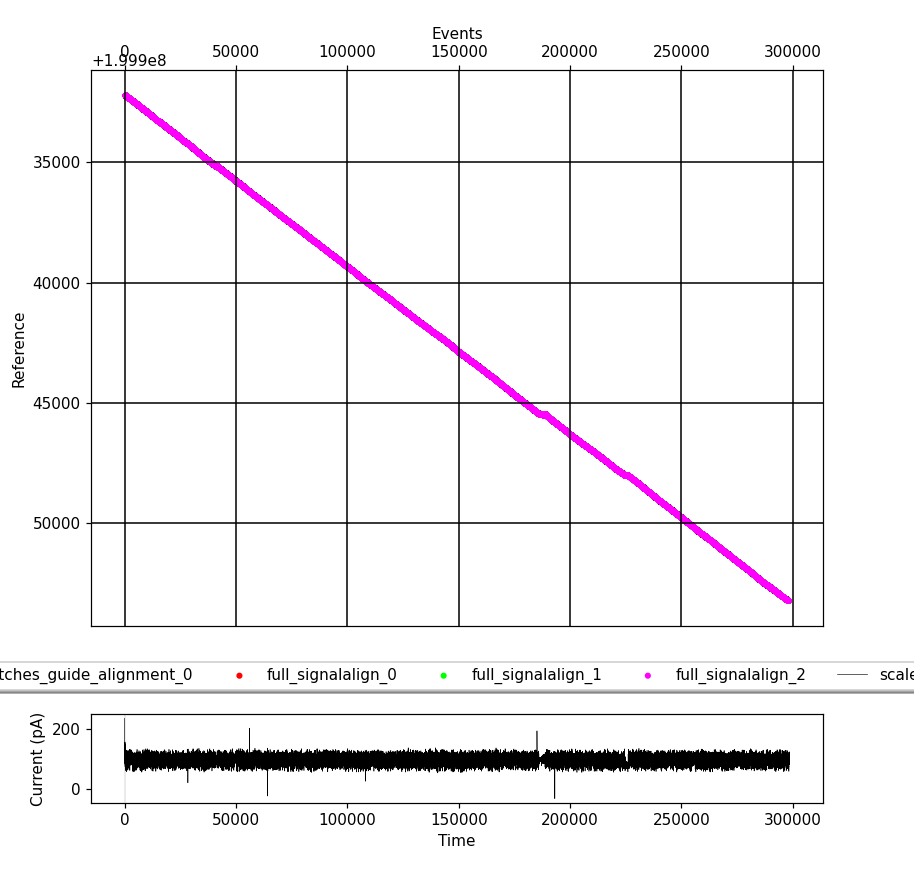

Running Time = 3.539089849044103 seconds


In [9]:
args = create_dot_dict({
    "f5_path": "plot_examples/pass/read_00e722a6-3b45-485f-98ad-ca091e597117.fast5",
    "sa_full": [0, 1, 2]})
main(args)

## Pass but with a discrepancy 

None
Plotting plot_examples/pass_but_miss/read_51876baa-21c9-46d1-9e37-abb36b0dc410.fast5


<IPython.core.display.Javascript object>


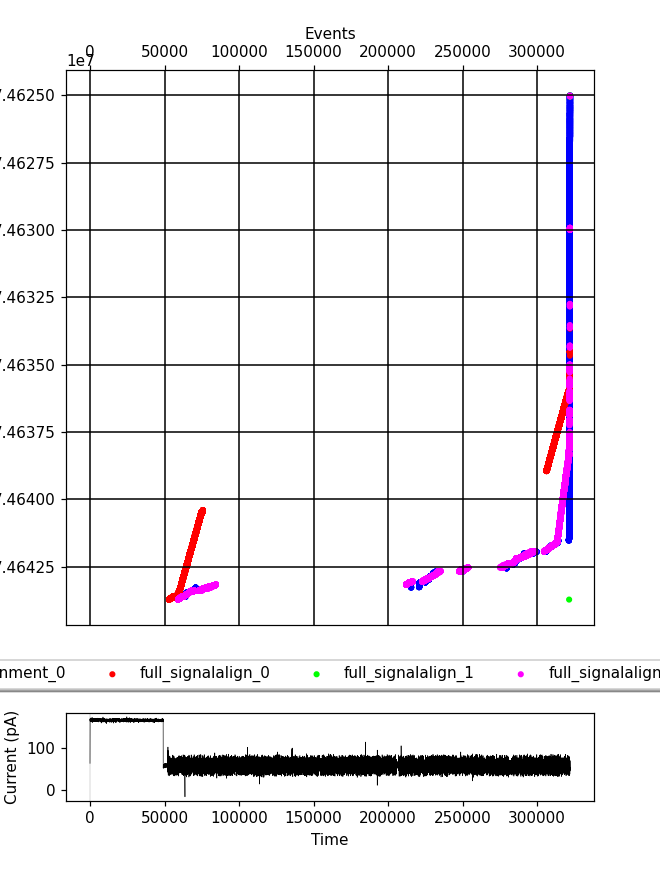

Running Time = 3.46834708499955 seconds


In [16]:
args = create_dot_dict({
    "f5_path": "plot_examples/pass_but_miss/read_51876baa-21c9-46d1-9e37-abb36b0dc410.fast5",
    "sa_full": [0, 1, 2]})
main(args)

In [2]:
import pandas as pd
import numpy as np
from functools import reduce
import string
def create_merged_table(list_of_variant_files):
    data = [pd.read_csv(x) for x in list_of_variant_files]
    suffixes = list(string.printable[:-6])
    assert len(data) < len(suffixes)
    suffix_list = ["_"+x for x in suffixes[:len(data)-1]]
    merged_data = pd.merge(data[0],data[1], sort=False, on=["read_id", "contig","reference_index", "strand", "variants"],
                                                how='outer', suffixes=["", suffix_list[0]])
    for i in range(2, len(data)):
        merged_data = pd.merge(merged_data, data[i], sort=False, on=["read_id", "contig","reference_index", "strand", "variants"],
                                            how='outer', suffixes=["", suffix_list[i-1]])
    return merged_data

def get_missing_calls(df):
    columns = [x for x in df.columns if x.startswith("prob2")]
    truth_table = df[columns[0]].isnull()
    for i in range(1, len(columns)):
        truth_table |= df[columns[i]].isnull()

    return df[truth_table]

failed_reads = "baseline_model_failed_reads.txt"
FAILED_READS = set(pd.read_csv(failed_reads)["read_id"])

In [11]:
# 0.01 threshold
models = ["variant_calls/FAB39088_dna_baseline_ATCGMQ_sa.model.csv"]
for i in range(20):
    models.append(f"variant_calls/FAB39088_dna_native_r9.4_native-5mc_run-1_{i}.model.csv")
for i in range(50):
    models.append(f"variant_calls/FAB39088_dna_native-5mc_r9.4_native-5mc_run-1_0.05_{i}.model.csv")
all_data = create_merged_table(models)
missing_all_data = get_missing_calls(all_data)
ids = set(missing_all_data["read_id"])
non_failed_reads = ids - FAILED_READS
non_failed_reads_hits = missing_all_data[missing_all_data["read_id"].isin(non_failed_reads)]
print(f"Number of Reads : {len(set(all_data['read_id']))}")
print(f"Number of Variants : {len(all_data)}")
print(f"Number of missing Variants : {len(missing_all_data)}")
print(f"Number of Reads with missing Variants : {len(ids)}")
print(f"Number of Failed Reads {len(FAILED_READS)}")
print(f"0.01 Non failed reads {len(non_failed_reads)}, hits {len(non_failed_reads_hits)}: {non_failed_reads}")


Number of Reads : 1592
Number of Variants : 49424
Number of missing Variants : 677
Number of Reads with missing Variants : 66
Number of Failed Reads 175
0.01 Non failed reads 2, hits 33: {'51876baa-21c9-46d1-9e37-abb36b0dc410', 'c4cf8ee1-8007-496f-a40a-c84a5c6a0e57'}


In [12]:
non_failed_reads_hits

,read_id,contig,reference_index,strand,variants,prob1,prob2,prob3,prob4,prob1_0,...,prob3_&,prob4_&,prob1_',prob2_',prob3_',prob4_',prob1_(,prob2_(,prob3_(,prob4_(
18098,51876baa-21c9-46d1-9e37-abb36b0dc410,chr18,74635976,-,CM,0.763661,0.236339,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18099,51876baa-21c9-46d1-9e37-abb36b0dc410,chr18,74635989,-,CM,0.704561,0.295439,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18100,51876baa-21c9-46d1-9e37-abb36b0dc410,chr18,74636607,-,CM,0.878066,0.121934,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18101,51876baa-21c9-46d1-9e37-abb36b0dc410,chr18,74636628,-,CM,0.851455,0.148545,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18102,51876baa-21c9-46d1-9e37-abb36b0dc410,chr18,74636782,-,CM,0.865597,0.134403,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18103,51876baa-21c9-46d1-9e37-abb36b0dc410,chr18,74636842,-,CM,0.843402,0.156598,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18104,51876baa-21c9-46d1-9e37-abb36b0dc410,chr18,74636916,-,CM,0.917101,0.082899,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18105,51876baa-21c9-46d1-9e37-abb36b0dc410,chr18,74637134,-,CM,0.891960,0.108040,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18106,51876baa-21c9-46d1-9e37-abb36b0dc410,chr18,74637206,-,CM,0.757092,0.242908,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18107,51876baa-21c9-46d1-9e37-abb36b0dc410,chr18,74637430,-,CM,0.904011,0.095989,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# 0.001 threshold
# model_2 = "001_variant_calls/FAB39088_dna_native_r9.4_native_on_5mc_2.model.csv"
# model_og = "001_variant_calls/FAB39088_dna_baseline_ATCGMQ_sa.model.csv"
# all_data = create_merged_table([model_2, model_og])
# missing_all_data = get_missing_calls(all_data)
# ids = set(missing_all_data["read_id"])
# print(len(ids))
# non_failed_reads = ids - FAILED_READS
# non_failed_reads_hits = missing_all_data[missing_all_data["read_id"].isin(non_failed_reads)]
# print(f"0.001 Non failed reads {len(non_failed_reads)}, hits {len(non_failed_reads_hits)}: {non_failed_reads}")


In [15]:
# 0.000 threshold
# model_2 = "000_variant_calls/FAB39088_dna_native_r9.4_native_on_5mc_2.model.csv"
# model_og = "000_variant_calls/FAB39088_dna_baseline_ATCGMQ_sa.model.csv"
# model_1 = "000_variant_calls/FAB39088_dna_native_r9.4_native_on_5mc_1.model.csv"
# all_data = create_merged_table([model_2, model_og])
# missing_all_data = get_missing_calls(all_data)
# ids = set(missing_all_data["read_id"])
# print(len(ids))
# non_failed_reads = ids - FAILED_READS
# non_failed_reads_hits = missing_all_data[missing_all_data["read_id"].isin(non_failed_reads)]
# print(f"0.0 Non failed reads {len(non_failed_reads)}, hits {len(non_failed_reads_hits)}: {non_failed_reads}")
